# Healthcare Insurance Analysis

## Objective

#### The objective of this project is to predict patients’ healthcare costs and to identify factors contributing to this prediction. It will also be useful to learn the interdependencies of different factors and comprehend the significance of various tools at various stages of the healthcare cost prediction process.

### 1. Importing the required libraries and the datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1=pd.read_csv('Hospitalisation details.csv')

In [3]:
df1.head()

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013


In [4]:
df2=pd.read_csv('Medical Examinations.csv')

In [5]:
df2.head()

,Customer ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker
0,Id1,47.410,7.47,No,No,No,No major surgery,yes
1,Id2,30.360,5.77,No,No,No,No major surgery,yes
2,Id3,34.485,11.87,yes,No,No,2,yes
3,Id4,38.095,6.05,No,No,No,No major surgery,yes
4,Id5,35.530,5.45,No,No,No,No major surgery,yes


In [6]:
df3=pd.read_excel('Names.xlsx')

In [7]:
df3.head()

,Customer ID,name
0,Id1,"Hawks, Ms. Kelly"
1,Id2,"Lehner, Mr. Matthew D"
2,Id3,"Lu, Mr. Phil"
3,Id4,"Osborne, Ms. Kelsey"
4,Id5,"Kadala, Ms. Kristyn"


### 2. Merging the datasets and preliminary data inspection

In [8]:
merged_df = pd.merge(df1, df2, on='Customer ID')

In [9]:
df=pd.merge(merged_df,df3,on='Customer ID')

In [10]:
df.head()

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013,17.58,4.51,No,No,No,1,No,"German, Mr. Aaron K"
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013,17.60,4.39,No,No,No,1,No,"Rosendahl, Mr. Evan P"
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013,16.47,6.35,No,No,Yes,1,No,"Albano, Ms. Julie"
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013,17.70,6.28,No,No,No,1,No,"Riveros Gonzalez, Mr. Juan D. Sr."
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013,22.34,5.57,No,No,No,1,No,"Brietzke, Mr. Jordan"


In [11]:
df.shape

(2335, 17)

In [12]:
df.isnull().sum()

Customer ID               0
year                      0
month                     0
date                      0
children                  0
charges                   0
Hospital tier             0
City tier                 0
State ID                  0
BMI                       0
HBA1C                     0
Heart Issues              0
Any Transplants           0
Cancer history            0
NumberOfMajorSurgeries    0
smoker                    0
name                      0
dtype: int64

##### There are no missing values and duplicates in the dataset

In [13]:
df.duplicated().sum()

0

### 3. Find the percentage of rows that have trivial value (for example, ?), and delete such rows if they do not contain significant information

In [14]:
df['year'].unique()

array(['1992', '1993', '1998', '2001', '1995', '2002', '1997', '1999',
       '1996', '2004', '2000', '1994', '2003', '1989', '1991', '1988',
       '1990', '1987', '1986', '1981', '1985', '1984', '1983', '1982',
       '1980', '1979', '1977', '1978', '1974', '1973', '1972', '1975',
       '1971', '1970', '1969', '1976', '1968', '1966', '1965', '1967',
       '1962', '1963', '1964', '?', '1961', '1960', '1959', '1958'],
      dtype=object)

In [15]:
cols_with_question_mark = df.columns[df.isin(['?']).any()]

In [16]:
cols_with_question_mark

Index(['year', 'month', 'Hospital tier', 'City tier', 'State ID', 'smoker'], dtype='object')

##### We can see ? values in these columns

In [17]:
trivial_percentage_year = (df['year'] == '?').sum() / len(df) * 100

In [18]:
trivial_percentage_year

0.08565310492505353

In [19]:
df = df[df['year'] != '?']

In [20]:
df.shape

(2333, 17)

In [21]:
df['month'].unique()

array(['Jul', 'Nov', 'Jun', 'Sep', 'Dec', '?', 'Aug', 'Oct'], dtype=object)

In [22]:
trivial_percentage_month=(df['month']=='?').sum()/len(df)*100

In [23]:
trivial_percentage_month

0.12858979854264896

In [24]:
df=df[df['month']!='?']

In [25]:
df.shape

(2330, 17)

In [26]:
df.date.unique()

array([ 9, 30, 13, 27, 20,  1,  4, 29, 12, 26, 14, 22, 28,  7, 18, 19,  5,
       17, 24,  6, 11, 15, 25, 10,  2, 16,  8, 21,  3, 23], dtype=int64)

In [27]:
df.children.unique()

array([0, 1, 3, 2, 4, 5], dtype=int64)

In [28]:
df.charges.dtypes

dtype('float64')

In [29]:
df['Hospital tier'].unique()

array(['tier - 2', 'tier - 3', '?', 'tier - 1'], dtype=object)

In [30]:
has_question_mark = "?" in df['Hospital tier'].values

# print the result
if has_question_mark:
    print("The column has '?' in it.")
else:
    print("The column does not have '?' in it.")

The column has '?' in it.


In [31]:
df=df[df['Hospital tier']!='?']

In [32]:
df.shape

(2329, 17)

In [33]:
has_question_mark = "?" in df['City tier'].values

# print the result
if has_question_mark:
    print("The column has '?' in it.")
else:
    print("The column does not have '?' in it.")

The column does not have '?' in it.


In [34]:
df['City tier'].unique()

array(['tier - 3', 'tier - 1', 'tier - 2'], dtype=object)

In [35]:
df['State ID'].unique()

array(['R1013', 'R1012', 'R1011', 'R1015', 'R1019', 'R1016', 'R1018',
       'R1025', 'R1024', 'R1023', 'R1014', 'R1021', 'R1017', 'R1020',
       'R1026', '?', 'R1022'], dtype=object)

In [36]:
df=df[df['State ID']!='?']

In [37]:
df=df[df['smoker']!='?']

### 4. The variable NumberOfMajorSurgeries also appears to have string values. Apply a suitable method to clean up this variable.

In [38]:
df['NumberOfMajorSurgeries'].unique()

array(['1', 'No major surgery', '2', '3'], dtype=object)

In [39]:
df['NumberOfMajorSurgeries']=df['NumberOfMajorSurgeries'].replace('No major surgery', 0)

In [40]:
df['NumberOfMajorSurgeries'].unique()

array(['1', 0, '2', '3'], dtype=object)

### 5. The gender of the patient may be an important factor in determining the cost of hospitalization. The salutations in a beneficiary's name can be used to determine their gender. Make a new field for the beneficiary's gender.

In [41]:
df.name

0                     German, Mr.  Aaron K
1                   Rosendahl, Mr.  Evan P
2                       Albano, Ms.  Julie
3       Riveros Gonzalez, Mr.  Juan D. Sr.
4                    Brietzke, Mr.  Jordan
                       ...                
2329                Baker, Mr.  Russell B.
2330                  Kadala, Ms.  Kristyn
2331                  Osborne, Ms.  Kelsey
2333                Lehner, Mr.  Matthew D
2334                     Hawks, Ms.  Kelly
Name: name, Length: 2325, dtype: object

In [42]:
import re

In [43]:
salutations = df['name'].str.extract(r'(?<=, )(\bMr\.|\bMrs\.|\bMs\.|\bMiss|\bDr\.)', flags=re.IGNORECASE, expand=False)

In [44]:
unique_salutations = salutations.explode().unique()

In [45]:
print(unique_salutations)

['Mr.' 'Ms.' 'Mrs.']


In [46]:
gender_map = {'Mr.': 'Male', 'Ms.': 'Female', 'Mrs.': 'Female'}

In [47]:
df['gender'] = salutations.map(gender_map)

In [48]:
df.head(15)

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name,gender
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013,17.58,4.51,No,No,No,1,No,"German, Mr. Aaron K",Male
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013,17.60,4.39,No,No,No,1,No,"Rosendahl, Mr. Evan P",Male
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013,16.47,6.35,No,No,Yes,1,No,"Albano, Ms. Julie",Female
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013,17.70,6.28,No,No,No,1,No,"Riveros Gonzalez, Mr. Juan D. Sr.",Male
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013,22.34,5.57,No,No,No,1,No,"Brietzke, Mr. Jordan",Male
5,Id2330,2001,Nov,20,0,646.14,tier - 3,tier - 3,R1012,22.24,4.29,yes,No,No,0,No,"Kohls, Ms. Katy",Female
6,Id2329,1993,Jun,1,0,650.00,tier - 3,tier - 3,R1013,17.07,5.22,No,No,Yes,1,No,"Bohinski, Ms. Susan E",Female
7,Id2328,1995,Jul,4,0,650.00,tier - 3,tier - 3,R1013,17.82,5.26,yes,No,No,1,No,"Avery, Ms. Nicole",Female
8,Id2327,2002,Nov,29,0,668.00,tier - 3,tier - 2,R1012,21.77,10.67,No,No,No,0,No,"Howell, Ms. Laura",Female
9,Id2326,1997,Nov,9,0,670.00,tier - 3,tier - 3,R1013,20.10,5.60,yes,No,Yes,1,No,"Castro, Mr. Sebastian",Male


### 6. Age appears to be a significant factor in this analysis. Calculate the patients' ages based on their dates of birth.

In [49]:
from datetime import date
from datetime import datetime

In [50]:
df['day']=df['date']

In [51]:
df['month'] = df['month'].apply(lambda x: datetime.strptime(x, '%b').month)

In [52]:
df['dob'] = pd.to_datetime(df[['year', 'month', 'day']])


In [53]:
today = datetime.now()

In [54]:
df['age'] = (today - df['dob']).dt.days / 365.25

In [55]:
df.head()

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,...,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name,gender,day,dob,age
0,Id2335,1992,7,9,0,563.84,tier - 2,tier - 3,R1013,17.58,...,No,No,No,1,No,"German, Mr. Aaron K",Male,9,1992-07-09,30.885695
1,Id2334,1992,11,30,0,570.62,tier - 2,tier - 1,R1013,17.60,...,No,No,No,1,No,"Rosendahl, Mr. Evan P",Male,30,1992-11-30,30.491444
2,Id2333,1993,6,30,0,600.00,tier - 2,tier - 1,R1013,16.47,...,No,No,Yes,1,No,"Albano, Ms. Julie",Female,30,1993-06-30,29.911020
3,Id2332,1992,9,13,0,604.54,tier - 3,tier - 3,R1013,17.70,...,No,No,No,1,No,"Riveros Gonzalez, Mr. Juan D. Sr.",Male,13,1992-09-13,30.704997
4,Id2331,1998,7,27,0,637.26,tier - 3,tier - 3,R1013,22.34,...,No,No,No,1,No,"Brietzke, Mr. Jordan",Male,27,1998-07-27,24.837782


### 7.  You should also visualize the distribution of costs using a histogram, box and whisker plot, and swarm plot.

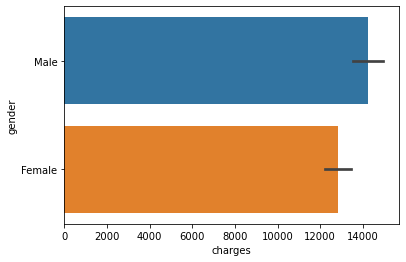

In [56]:
sns.barplot(data=df, x="charges", y="gender")
plt.show()

<AxesSubplot:xlabel='charges', ylabel='Count'>

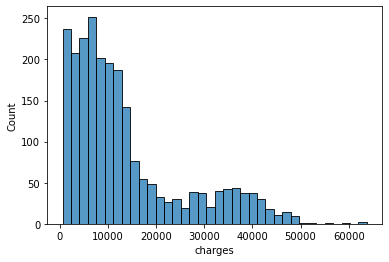

In [57]:
sns.histplot(data=df, x="charges")

<AxesSubplot:xlabel='charges'>

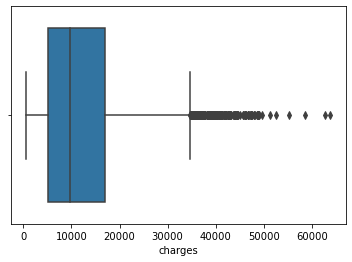

In [58]:
sns.boxplot(data=df,x="charges")

<AxesSubplot:xlabel='charges'>

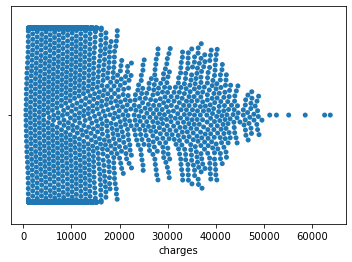

In [59]:
sns.swarmplot(data=df,x="charges")

<AxesSubplot:xlabel='charges', ylabel='Count'>

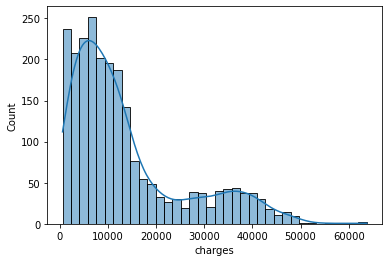

In [60]:
sns.histplot(df,x="charges",kde=True)

### 8. Outlier Treatment

In [61]:
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1

In [62]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [63]:
outliers = df[(df['charges'] < lower_bound) | (df['charges'] > upper_bound)]
num_outliers = len(outliers)

In [64]:
num_outliers

233

In [65]:
percentage_outliers = (num_outliers / len(df)) * 100

In [66]:
percentage_outliers

10.021505376344086

In [67]:
df = df.drop(df[(df['charges'] < lower_bound) | (df['charges'] > upper_bound)].index)

In [68]:
df.shape

(2092, 21)

<AxesSubplot:xlabel='charges', ylabel='Count'>

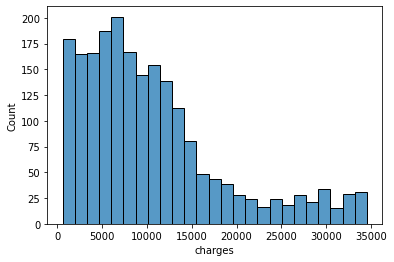

In [69]:
sns.histplot(data=df,x='charges')

### 9. Create a radar chart to showcase the median hospitalization cost for each tier of hospitals

In [70]:
median_costs = df.groupby('Hospital tier')['charges'].median()

In [71]:
median_costs

Hospital tier
tier - 1    19518.755
tier - 2     6653.790
tier - 3    10676.830
Name: charges, dtype: float64

In [72]:
categories = median_costs.index
values = median_costs.values

Text(0.5, 1.0, 'Median Hospitalization Cost by Hospital Tier')

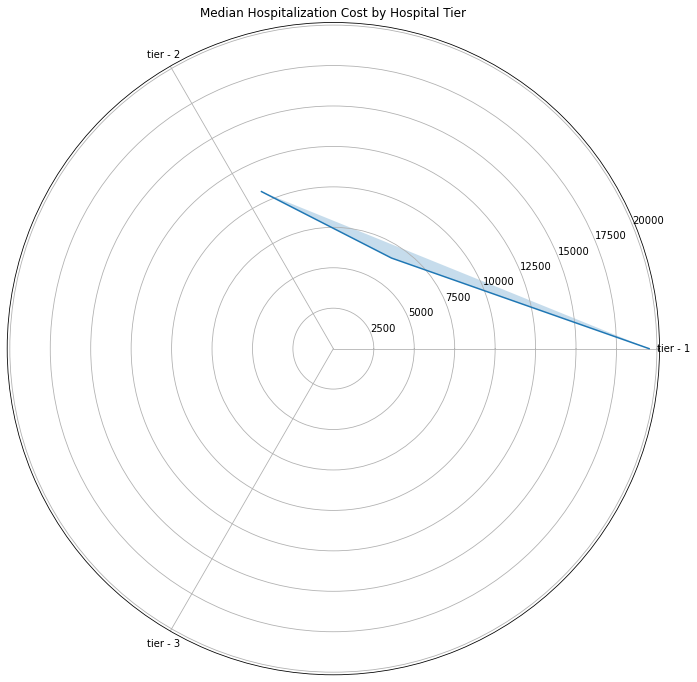

In [73]:
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(polar=True))
ax.plot(categories, values)
ax.fill(categories, values, alpha=0.25)
ax.set_xticks(np.linspace(0, 2*np.pi, len(categories), endpoint=False))
ax.set_xticklabels(categories)
ax.set_title('Median Hospitalization Cost by Hospital Tier')

### 10. Create a frequency table and a stacked bar chart to visualize the count of people in the different tiers of cities and hospitals

In [74]:
city_counts = df['City tier'].value_counts()
hospital_counts = df['Hospital tier'].value_counts()

In [75]:
city_counts

tier - 2    719
tier - 3    701
tier - 1    672
Name: City tier, dtype: int64

In [76]:
hospital_counts

tier - 2    1229
tier - 3     691
tier - 1     172
Name: Hospital tier, dtype: int64

In [77]:
city_counts_df = pd.DataFrame({'City Tier': city_counts})
hospital_counts_df = pd.DataFrame({'Hospital Tier': hospital_counts})

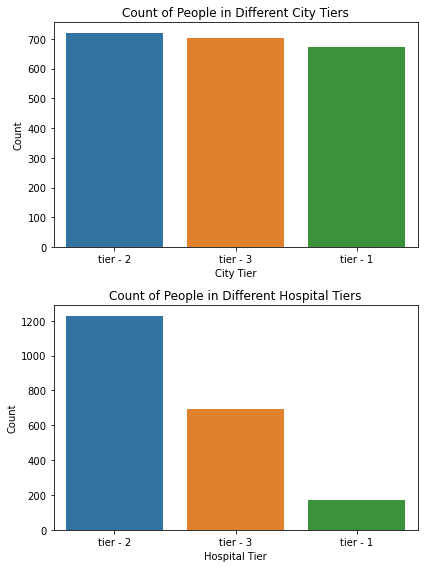

In [78]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(6, 8))

sns.barplot(data=city_counts_df, x=city_counts_df.index, y='City Tier', ax=ax1)
ax1.set_xlabel('City Tier')
ax1.set_ylabel('Count')
ax1.set_title('Count of People in Different City Tiers')


sns.barplot(data=hospital_counts_df, x=hospital_counts_df.index, y='Hospital Tier', ax=ax2)
ax2.set_xlabel('Hospital Tier')
ax2.set_ylabel('Count')
ax2.set_title('Count of People in Different Hospital Tiers')

plt.tight_layout()

plt.show()

### 11. Encoding for Hospital and city tiers

In [79]:
df['Hospital tier'] = df['Hospital tier'].replace({'tier - 3':3, 'tier - 1':1, 'tier - 2':2})
df['City tier'] = df['City tier'].replace({'tier - 3':3, 'tier - 1':1, 'tier - 2':2})

In [80]:
df.dtypes

Customer ID                       object
year                              object
month                              int64
date                               int64
children                           int64
charges                          float64
Hospital tier                      int64
City tier                          int64
State ID                          object
BMI                              float64
HBA1C                            float64
Heart Issues                      object
Any Transplants                   object
Cancer history                    object
NumberOfMajorSurgeries            object
smoker                            object
name                              object
gender                            object
day                                int64
dob                       datetime64[ns]
age                              float64
dtype: object

### 12. Hypothesis Testing

#### a.)The average hospitalization costs for the three types of hospitals are not significantly different

In [81]:
import scipy.stats as stats

# Separate the hospitalization costs by hospital tier
hospital_tier_1 = df.loc[df['Hospital tier'] == 1, 'charges']
hospital_tier_2 = df.loc[df['Hospital tier'] == 2, 'charges']
hospital_tier_3 = df.loc[df['Hospital tier'] == 3, 'charges']

# Perform one-way ANOVA
fvalue, pvalue = stats.f_oneway(hospital_tier_1, hospital_tier_2, hospital_tier_3)

# Set significance level (alpha)
alpha = 0.05

# Print the results
if pvalue < alpha:
    print("Reject the null hypothesis. The average hospitalization costs for the three types of hospitals are significantly different.")
else:
    print("Fail to reject the null hypothesis. The average hospitalization costs for the three types of hospitals are not significantly different.")

Reject the null hypothesis. The average hospitalization costs for the three types of hospitals are significantly different.


#### b. The average hospitalization costs for the three types of cities are not significantly different

In [82]:
# Separate the hospitalization costs by city tier
city_tier_1 = df.loc[df['City tier'] == 1, 'charges']
city_tier_2 = df.loc[df['City tier'] == 2, 'charges']
city_tier_3 = df.loc[df['City tier'] == 3, 'charges']

# Perform one-way ANOVA
fvalue, pvalue = stats.f_oneway(city_tier_1, city_tier_2, city_tier_3)

# Set significance level (alpha)
alpha = 0.05

# Print the results
if pvalue < alpha:
    print("Reject the null hypothesis. The average hospitalization costs for the three types of cities are significantly different.")
else:
    print("Fail to reject the null hypothesis. The average hospitalization costs for the three types of cities are not significantly different.")
    
    

Fail to reject the null hypothesis. The average hospitalization costs for the three types of cities are not significantly different.


#### c. The average hospitalization cost for smokers is not significantly different from the average cost for nonsmokers

In [83]:
# Separate the hospitalization costs for smokers and nonsmokers
smokers = df.loc[df['smoker'] == 'Yes', 'charges']
nonsmokers = df.loc[df['smoker'] == 'No', 'charges']

# Perform independent t-test
t_statistic, p_value = stats.ttest_ind(smokers, nonsmokers)

# Set significance level (alpha)
alpha = 0.05

# Print the results
if p_value < alpha:
    print("Reject the null hypothesis. The average hospitalization cost for smokers is significantly different from the average cost for nonsmokers.")
else:
    print("Fail to reject the null hypothesis. The average hospitalization cost for smokers is not significantly different from the average cost for nonsmokers.")

Fail to reject the null hypothesis. The average hospitalization cost for smokers is not significantly different from the average cost for nonsmokers.


#### d. Smoking and heart issues are independent

In [84]:
# Create a contingency table of smoking and heart issues
contingency_table = pd.crosstab(df['smoker'], df['Heart Issues'])

# Perform chi-square test of independence
chi2_statistic, p_value, _, _ = stats.chi2_contingency(contingency_table)

# Set significance level (alpha)
alpha = 0.05

# Print the results
if p_value < alpha:
    print("Reject the null hypothesis. Smoking and heart issues are dependent.")
else:
    print("Fail to reject the null hypothesis. Smoking and heart issues are independent.")

Fail to reject the null hypothesis. Smoking and heart issues are independent.


### 13. Encoding for remaining variables

In [85]:
df.dtypes

Customer ID                       object
year                              object
month                              int64
date                               int64
children                           int64
charges                          float64
Hospital tier                      int64
City tier                          int64
State ID                          object
BMI                              float64
HBA1C                            float64
Heart Issues                      object
Any Transplants                   object
Cancer history                    object
NumberOfMajorSurgeries            object
smoker                            object
name                              object
gender                            object
day                                int64
dob                       datetime64[ns]
age                              float64
dtype: object

In [86]:
df['Heart Issues'] = df['Heart Issues'].replace({'No': 0, 'yes': 1})
df['Any Transplants'] = df['Any Transplants'].replace({'No': 0, 'yes': 1})
df['Cancer history'] = df['Cancer history'].replace({'No': 0, 'Yes': 1})
df['smoker'] = df['smoker'].replace({'No': 0, 'yes': 1})

In [87]:
df['NumberOfMajorSurgeries'].unique()

array(['1', 0, '2', '3'], dtype=object)

In [88]:
df['NumberOfMajorSurgeries'] = pd.to_numeric(df['NumberOfMajorSurgeries'], errors='coerce')

In [89]:
df.gender.unique()

array(['Male', 'Female'], dtype=object)

In [90]:
gender_mapping = {'Male': 0, 'Female': 1}
df['gender'] = df['gender'].map(gender_mapping)

In [91]:
df.dtypes

Customer ID                       object
year                              object
month                              int64
date                               int64
children                           int64
charges                          float64
Hospital tier                      int64
City tier                          int64
State ID                          object
BMI                              float64
HBA1C                            float64
Heart Issues                       int64
Any Transplants                    int64
Cancer history                     int64
NumberOfMajorSurgeries             int64
smoker                             int64
name                              object
gender                             int64
day                                int64
dob                       datetime64[ns]
age                              float64
dtype: object

In [92]:
df=df.drop(columns=['year','month','date','day','dob'])

In [93]:
df = df.drop(['Customer ID', 'name'], axis=1)

In [94]:
df.dtypes

children                    int64
charges                   float64
Hospital tier               int64
City tier                   int64
State ID                   object
BMI                       float64
HBA1C                     float64
Heart Issues                int64
Any Transplants             int64
Cancer history              int64
NumberOfMajorSurgeries      int64
smoker                      int64
gender                      int64
age                       float64
dtype: object

##### The dataset has State ID, which has around 16 states. All states are not represented in equal proportions in the data. Creating dummy variables for all regions may also result in too many insignificant predictors. Nevertheless, only R1011, R1012, and R1013 are worth investigating further. Create a suitable strategy to create dummy variables with these restraints.

In [95]:
df_dummy = df.copy()

# Create a list of states of interest
states_of_interest = ['R1011', 'R1012', 'R1013']

# Replace states not in the list of interest with 'Other'
df_dummy['State ID'] = df_dummy['State ID'].where(df_dummy['State ID'].isin(states_of_interest), 'Other')

# Create dummy variables for the states column
dummy_variables = pd.get_dummies(df_dummy['State ID'], prefix='State')

# Concatenate the dummy variables with the original dataset
df_dummy = pd.concat([df_dummy, dummy_variables], axis=1)

# Drop the original 'State ID' column
df_dummy.drop('State ID', axis=1, inplace=True)

# Display the modified dataset with dummy variables
df_dummy.head()

,children,charges,Hospital tier,City tier,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,gender,age,State_Other,State_R1011,State_R1012,State_R1013
0,0,563.84,2,3,17.58,4.51,0,0,0,1,0,0,30.885695,0,0,0,1
1,0,570.62,2,1,17.60,4.39,0,0,0,1,0,0,30.491444,0,0,0,1
2,0,600.00,2,1,16.47,6.35,0,0,1,1,0,1,29.911020,0,0,0,1
3,0,604.54,3,3,17.70,6.28,0,0,0,1,0,0,30.704997,0,0,0,1
4,0,637.26,3,3,22.34,5.57,0,0,0,1,0,0,24.837782,0,0,0,1


In [96]:
df_dummy.dtypes

children                    int64
charges                   float64
Hospital tier               int64
City tier                   int64
BMI                       float64
HBA1C                     float64
Heart Issues                int64
Any Transplants             int64
Cancer history              int64
NumberOfMajorSurgeries      int64
smoker                      int64
gender                      int64
age                       float64
State_Other                 uint8
State_R1011                 uint8
State_R1012                 uint8
State_R1013                 uint8
dtype: object

### 14. Examine the correlation between predictors to identify highly correlated predictors. Use a heatmap to visualize this.

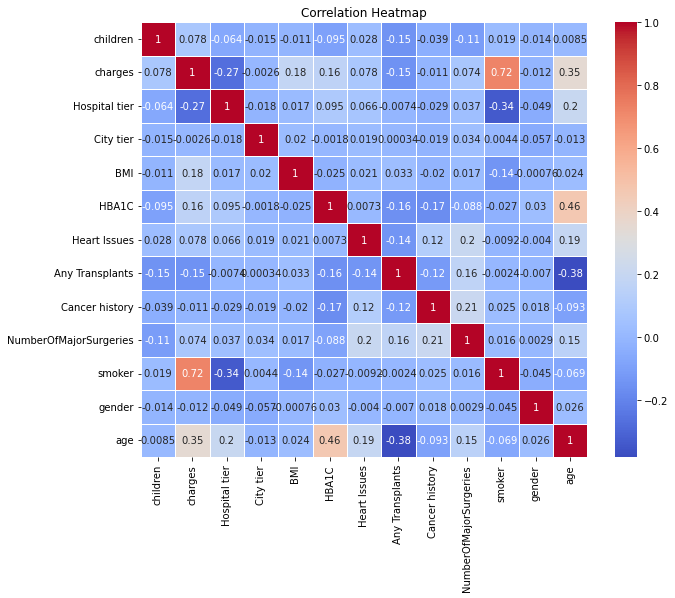

In [97]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### 15. Develop and evaluate the final model using regression with a stochastic gradient descent optimizer. 

In [98]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Split the data into features (X) and target variable (y)
X = df_dummy.drop('charges', axis=1)
y = df_dummy['charges']

# Initialize KFold with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the features
    ('regressor', SGDRegressor())  # Stochastic Gradient Descent Regressor
])

# Define the hyperparameter grid for tuning
param_grid = {
    'regressor__alpha': [0.0001, 0.001, 0.01],  # Regularization parameter
    'regressor__l1_ratio': [0.25, 0.5, 0.75],  # L1 ratio for Elastic Net regularization
    'regressor__max_iter': [1000, 2000, 3000],  # Maximum number of iterations
}

# Perform hyperparameter tuning using cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=kf, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X, y)

# Get the best model and best hyperparameters
best_model = grid_search.best_estimator_

# Perform cross-validation and obtain the RMSE scores
cv_scores = np.sqrt(-cross_val_score(best_model, X, y, cv=kf, scoring='neg_mean_squared_error'))

# Print the RMSE scores for each fold
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i} RMSE: {score}")

# Fit the best model on the entire dataset
best_model.fit(X, y)

# Get the feature importances or coefficients
feature_importances = best_model.named_steps['regressor'].coef_

# Create a DataFrame to display the variable importance scores
importance_df = pd.DataFrame({'Variable': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fold 1 RMSE: 3566.2097972947477
Fold 2 RMSE: 3216.717245753953
Fold 3 RMSE: 3737.8509344322897
Fold 4 RMSE: 3821.6443567603033
Fold 5 RMSE: 4381.584164274798


In [99]:
df_dummy.charges

0         563.84
1         570.62
2         600.00
3         604.54
4         637.26
          ...   
2095    34402.22
2096    34439.86
2097    34456.27
2098    34472.84
2099    34543.39
Name: charges, Length: 2092, dtype: float64

### 16. Use random forest and extreme gradient boosting for cost prediction, share your crossvalidation results, and calculate the variable importance scores

In [100]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

n_folds = 5

rf_regressor = RandomForestRegressor(random_state=42)
xgb_regressor = XGBRegressor(random_state=42)

rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('regressor', rf_regressor)  
])

xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', xgb_regressor) 
])

# Define the hyperparameter grids for tuning
rf_param_grid = {
    'regressor__n_estimators': [100, 200, 300],  
    'regressor__max_depth': [None, 5, 10],  
}

xgb_param_grid = {
    'regressor__n_estimators': [100, 200, 300],  
    'regressor__max_depth': [3, 5, 7], 
    'regressor__learning_rate': [0.1, 0.01, 0.001],  
}

# Perform hyperparameter tuning using cross-validation for Random Forest
rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=n_folds, scoring='neg_mean_squared_error', verbose=1)
rf_grid_search.fit(X, y)

# Perform hyperparameter tuning using cross-validation for XGBoost
xgb_grid_search = GridSearchCV(xgb_pipeline, xgb_param_grid, cv=n_folds, scoring='neg_mean_squared_error', verbose=1)
xgb_grid_search.fit(X, y)

best_rf_model = rf_grid_search.best_estimator_
best_rf_params = rf_grid_search.best_params_

best_xgb_model = xgb_grid_search.best_estimator_
best_xgb_params = xgb_grid_search.best_params_

kf = KFold(n_splits=n_folds, random_state=42, shuffle=True)
rf_cv_scores = np.sqrt(-cross_val_score(best_rf_model, X, y, cv=kf, scoring='neg_mean_squared_error'))

xgb_cv_scores = np.sqrt(-cross_val_score(best_xgb_model, X, y, cv=kf, scoring='neg_mean_squared_error'))


print("Random Forest Cross-Validation RMSE Scores:")
for i, score in enumerate(rf_cv_scores, 1):
    print(f"Fold {i} RMSE: {score}")
print("Best Random Forest Hyperparameters:")
print(best_rf_params)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Random Forest Cross-Validation RMSE Scores:
Fold 1 RMSE: 3123.099202840917
Fold 2 RMSE: 2864.1541245232106
Fold 3 RMSE: 3378.9131383672266
Fold 4 RMSE: 3641.2207053512643
Fold 5 RMSE: 4242.990206563739
Best Random Forest Hyperparameters:
{'regressor__max_depth': 5, 'regressor__n_estimators': 200}


### 17. Case scenario:


##### Estimate the cost of hospitalization for Christopher, Ms. Jayna (her date of birth is 12/28/1988, height is 170 cm, and weight is 85 kgs). She lives in a tier-1 city and her state’s State ID is R1011. She lives with her partner and two children. She was found to be nondiabetic (HbA1c = 5.8). She smokes but is otherwise healthy. She has had no transplants or major surgeries. Her father died of lung cancer. Hospitalization costs will be estimated using tier-1 hospitals.

In [101]:
import datetime
input_data = pd.DataFrame({
    'children': [0],
    'Hospital tier': [2],
    'City tier': [3],
    'BMI': [17.58],
    'HBA1C': [5.8],
    'Heart Issues': [0],
    'Any Transplants': [0],
    'Cancer history': [0],
    'NumberOfMajorSurgeries': [1],
    'smoker': [1],
    'age': [34.5],
    'gender': [0],
    'State_Other': [0],
    'State_R1011': [1],
    'State_R1012': [0],
    'State_R1013': [0]
})
input_df = pd.DataFrame(input_data)

In [102]:
estimated_cost = best_model.predict(input_df)[0]
print(f"Estimated cost of hospitalization for Ms. Jayna: {estimated_cost}")

Estimated cost of hospitalization for Ms. Jayna: 19344.191567117494
